In [1]:
import numpy as np  # Importing numpy for numerical computations
import pandas as pd  # Importing pandas for data manipulation
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
sns.set(style='whitegrid')  # Setting seaborn style to whitegrid for plots
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn for splitting data
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics from sklearn
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model from sklearn for regression analysis

In [2]:
df = pd.read_csv("smartch_watch_cleaned.csv")  
# Reading the CSV file "smartch_watch_cleaned.csv" into a pandas DataFrame and assigning it to the variable df.

In [3]:
df  
# Displaying the entire DataFrame df to inspect its contents.

Unnamed: 0                                     name  price  rating  \
0              0                          OnePlus Watch 2  24999    4.35   
1              1   Fire Boltt Dream WristPhone Smartwatch   6999    4.25   
2              2  Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35   
3              3          Fastrack Optimus Pro Smartwatch   2299    4.35   
4              4                             Oppo Watch X  12999    4.05   
...          ...                                      ...    ...     ...   
1015        1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70   
1016        1016             Maxima Max Pro X4 Smartwatch   1599    4.05   
1017        1017                 FCUK Series 2 Smartwatch   2231    4.30   
1018        1018                 Pebble Cosmos Smartwatch   3999    4.35   
1019        1019           Noise ColorFit Qube Smartwatch    999    4.20   

       wifi    GPS    NFC  voice_calling      Bluetooth  Bluetooth_calling  \
0      True   True   True          False  Bluetooth 5.0               True   
1      True   True  False           True  Bluetooth 5.0              False   
2      True   True   True          False  Bluetooth 5.0              False   
3     False  False  False          False  Bluetooth 5.2               True   
4      True   True   True          False  Bluetooth 5.0               True   
...     ...    ...    ...            ...            ...                ...   
1015  False  False  False          False  Bluetooth 5.0               True   
1016  False  False  False          False  Bluetooth 5.0              False   
1017  False  False  False          False  Bluetooth 5.0               True   
1018  False  False  False          False  Bluetooth 5.0               True   
1019  False  False  False          False  Bluetooth 5.1              False   

      ...  sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0     ...          False       False      False          True      False   
1     ...          False       False      False          True      False   
2     ...          False       False      False          True      False   
3     ...           True        True       True          True      False   
4     ...          False       False      False          True      False   
...   ...            ...         ...        ...           ...        ...   
1015  ...           True        True       True          True      False   
1016  ...           True        True       True          True      False   
1017  ...           True        True       True          True      False   
1018  ...           True        True      False          True      False   
1019  ...           True        True      False          True      False   

      alarm_clock  stopwatch  reminder  timer         battery  
0           False      False     False  False             NaN  
1           False      False     False  False             NaN  
2           False      False     False  False             NaN  
3           False      False     False  False   7days Battery  
4           False      False     False  False             NaN  
...           ...        ...       ...    ...             ...  
1015        False      False     False  False             NaN  
1016        False      False     False  False  15days Battery  
1017        False      False     False  False             NaN  
1018        False      False     False  False             NaN  
1019        False      False     False  False   7days Battery  

[1020 rows x 30 columns]

In [4]:
df.info()  
# Printing concise summary of the DataFrame df including information about the index dtype and column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   name                    1020 non-null   object 
 2   price                   1020 non-null   int64  
 3   rating                  1020 non-null   float64
 4   wifi                    1020 non-null   bool   
 5   GPS                     1020 non-null   bool   
 6   NFC                     1020 non-null   bool   
 7   voice_calling           1020 non-null   bool   
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       1020 non-null   bool   
 10  display_size_inches     990 non-null    float64
 11  Touch                   1020 non-null   bool   
 12  ram_gb                  91 non-null     float64
 13  memory_inbuilt          120 non-null    float64
 14  water_resistance        1020 non-null   

In [5]:
df.describe()  
# Generating descriptive statistics of the numerical columns in the DataFrame df, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

Unnamed: 0         price       rating  display_size_inches  \
count  1020.000000  1.020000e+03  1020.000000           990.000000   
mean    509.500000  1.078396e+04     4.376716             1.632101   
std     294.592939  6.871297e+04     0.224755             0.261606   
min       0.000000  3.940000e+02     4.000000             0.560000   
25%     254.750000  1.476250e+03     4.200000             1.400000   
50%     509.500000  1.999000e+03     4.350000             1.690000   
75%     764.250000  4.699000e+03     4.550000             1.850000   
max    1019.000000  2.048000e+06     4.750000             2.860000   

           ram_gb  memory_inbuilt  
count   91.000000      120.000000  
mean     2.915951       21.841667  
std     13.294433       16.397374  
min      0.007812        1.000000  
25%      1.000000        8.000000  
50%      1.500000       16.000000  
75%      2.000000       32.000000  
max    128.000000       64.000000

In [6]:
Bluetooth = df['Bluetooth'].copy()  
# Creating a copy of the 'Bluetooth' column from the DataFrame df and assigning it to the variable Bluetooth.

Bluetooth  
# Displaying the contents of the Bluetooth Series to inspect the copied data.

0       Bluetooth 5.0
1       Bluetooth 5.0
2       Bluetooth 5.0
3       Bluetooth 5.2
4       Bluetooth 5.0
            ...      
1015    Bluetooth 5.0
1016    Bluetooth 5.0
1017    Bluetooth 5.0
1018    Bluetooth 5.0
1019    Bluetooth 5.1
Name: Bluetooth, Length: 1020, dtype: object

In [7]:
brand = df['name'].str.split(' ').str.get(0)  
# Extracting the first word from the 'name' column of the DataFrame df and assigning it to the variable brand.

brand = brand.str.replace('Fire', 'Fire Boltt')  
# Replacing any occurrences of 'Fire' in the brand Series with 'Fire Boltt'.

In [8]:
brand.value_counts()  
# Counting the occurrences of each unique value in the brand Series and displaying the result, showing the distribution of brands in the dataset.

name
Fire Boltt    116
boAt          105
Noise          84
Fastrack       40
Pebble         33
             ... 
Compaq          1
Helix           1
Salora          1
Cosmo           1
eOnz            1
Name: count, Length: 148, dtype: int64

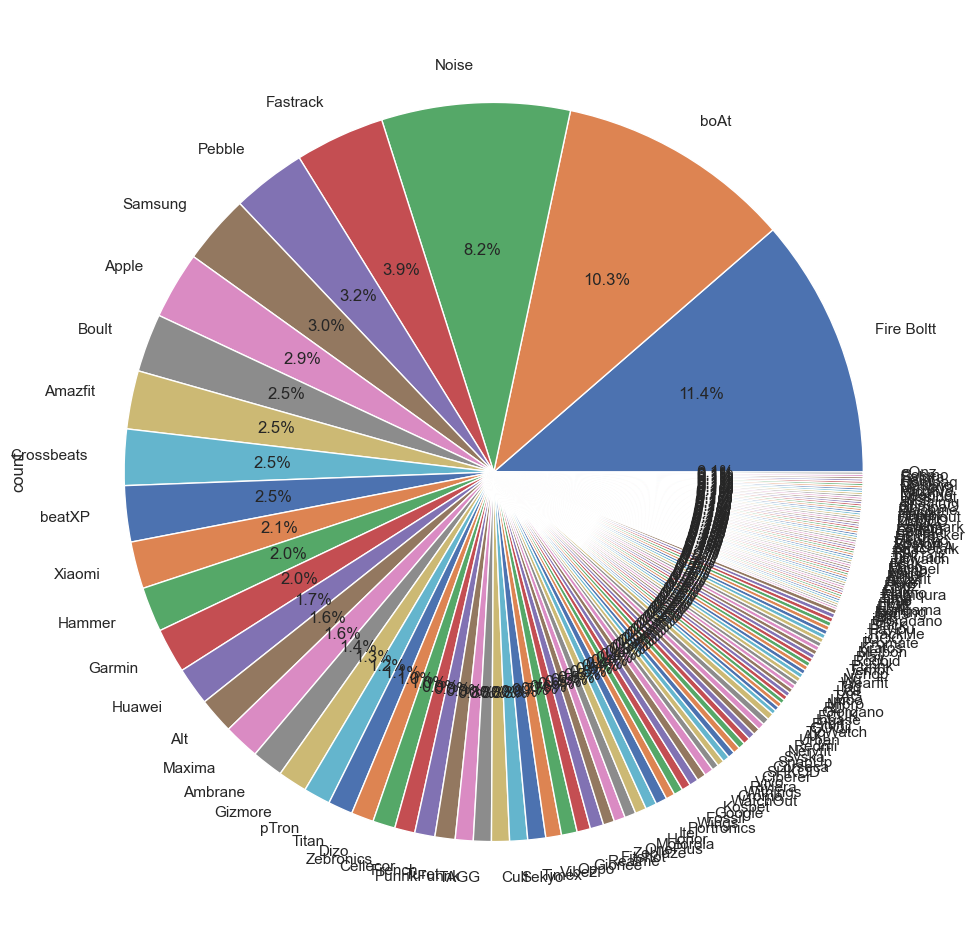

In [9]:
brand.value_counts().plot(kind='pie', figsize=(12, 12), autopct='%1.1f%%')  
# Creating a pie chart to visualize the distribution of brands using the value counts of the brand Series. The figsize parameter sets the size of the plot, and autopct='%1.1f%%' adds percentage labels to each pie wedge.

plt.show()  
# Displaying the pie chart.

In [10]:
df.info()  
# Printing concise summary of the DataFrame df including information about the index dtype and column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   name                    1020 non-null   object 
 2   price                   1020 non-null   int64  
 3   rating                  1020 non-null   float64
 4   wifi                    1020 non-null   bool   
 5   GPS                     1020 non-null   bool   
 6   NFC                     1020 non-null   bool   
 7   voice_calling           1020 non-null   bool   
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       1020 non-null   bool   
 10  display_size_inches     990 non-null    float64
 11  Touch                   1020 non-null   bool   
 12  ram_gb                  91 non-null     float64
 13  memory_inbuilt          120 non-null    float64
 14  water_resistance        1020 non-null   

In [11]:
df.drop(['Unnamed: 0', 'name', 'Bluetooth', 'ram_gb', 'memory_inbuilt', 'battery'], axis=1, inplace=True)  
# Dropping the specified columns ['Unnamed: 0', 'name', 'Bluetooth', 'ram_gb', 'memory_inbuilt', 'battery'] from the DataFrame df along the specified axis (columns) and making the changes inplace.

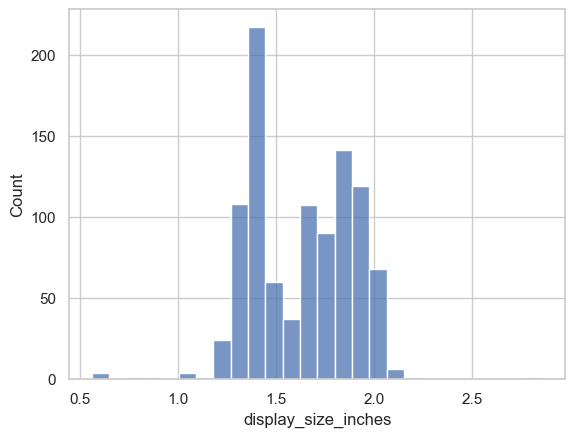

In [12]:
sns.histplot(x=df['display_size_inches'])  
# Creating a histogram plot to visualize the distribution of the 'display_size_inches' column using seaborn. The x parameter specifies the data to be plotted on the x-axis.

plt.show()  
# Displaying the histogram plot.

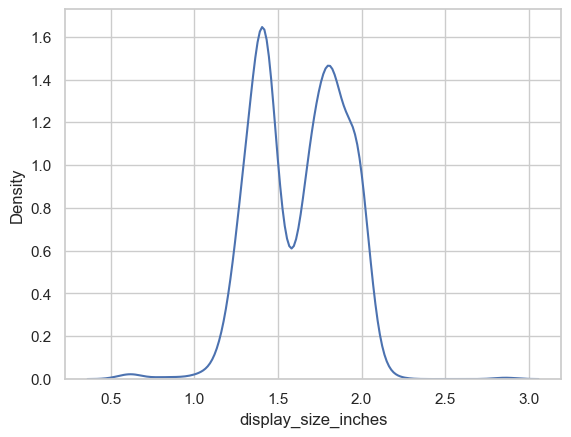

In [13]:
sns.kdeplot(x=df['display_size_inches'])  
# Creating a kernel density estimation plot to visualize the distribution of the 'display_size_inches' column using seaborn. The x parameter specifies the data to be plotted on the x-axis.

plt.show()  
# Displaying the kernel density estimation plot.

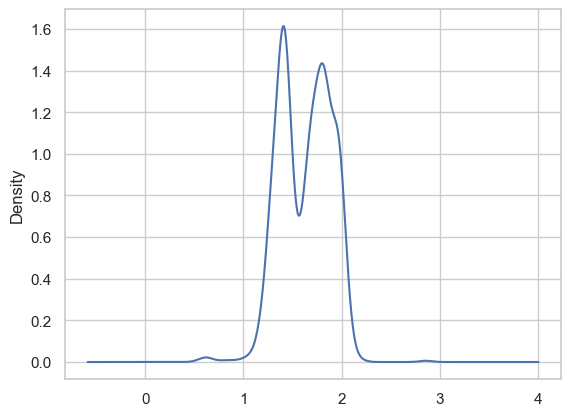

In [14]:
df.display_size_inches.fillna(df.display_size_inches.mean()).plot(kind='kde')  
# Plotting the kernel density estimation (KDE) of the 'display_size_inches' column after filling missing values with the mean using the fillna() method. The plot type is specified as 'kde' (kernel density estimation).

plt.show()  
# Displaying the KDE plot.

In [15]:
df.display_size_inches.fillna(df.display_size_inches.mean(), inplace=True)  
# Filling missing values in the 'display_size_inches' column with the mean value using the fillna() method, and making the changes inplace.

In [16]:
df.display_size_inches.fillna(df.display_size_inches.mean(), inplace=True)  
# Filling missing values in the 'display_size_inches' column with the mean value using the fillna() method, and making the changes inplace.

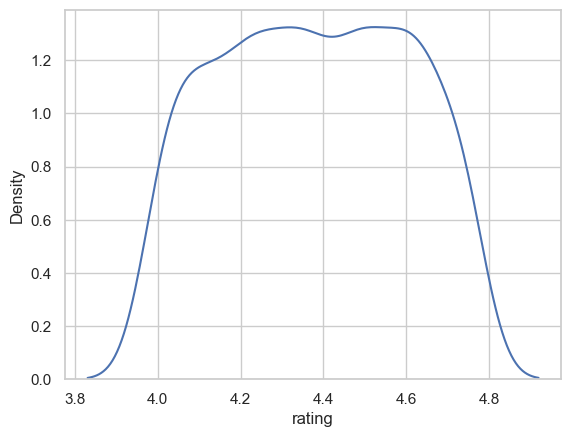

In [17]:
sns.kdeplot(x=df['rating'])  
# Creating a kernel density estimation plot to visualize the distribution of the 'rating' column using seaborn. The x parameter specifies the data to be plotted on the x-axis.

plt.show()  
# Displaying the kernel density estimation plot.

In [18]:
columns = ['wifi', 'GPS', 'NFC', 'voice_calling', 'Bluetooth_calling', 'Touch', 'water_resistance', 'dust_proof', 'scratch_resistance', 'heart_rate_monitor', 'Blood_Pressure_monitor', 'calorie_count', 'sleep_monitor', 'step_count', 'Pedometer', 'Blood_oxygen', 'Altimeter', 'alarm_clock', 'stopwatch', 'reminder', 'timer']  
# Defining a list of column names to be converted to integer type.

for i in columns:  
# Iterating over each column name in the 'columns' list.

    # df['{}'.format(i)] = df.i.astype(np.int64)  
    # Incorrect line: This will not work as expected because df.i tries to access the column named 'i' in the DataFrame df, which does not exist.

    df[i] = df[i].astype(np.int64)  
    # Converting the values in the specified column 'i' to the integer data type (np.int64).

In [19]:
df.info()  
# Printing concise summary of the DataFrame df including information about the index dtype and column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   1020 non-null   int64  
 1   rating                  1020 non-null   float64
 2   wifi                    1020 non-null   int64  
 3   GPS                     1020 non-null   int64  
 4   NFC                     1020 non-null   int64  
 5   voice_calling           1020 non-null   int64  
 6   Bluetooth_calling       1020 non-null   int64  
 7   display_size_inches     1020 non-null   float64
 8   Touch                   1020 non-null   int64  
 9   water_resistance        1020 non-null   int64  
 10  dust_proof              1020 non-null   int64  
 11  scratch_resistance      1020 non-null   int64  
 12  heart_rate_monitor      1020 non-null   int64  
 13  Blood_Pressure_monitor  1020 non-null   int64  
 14  calorie_count           1020 non-null   

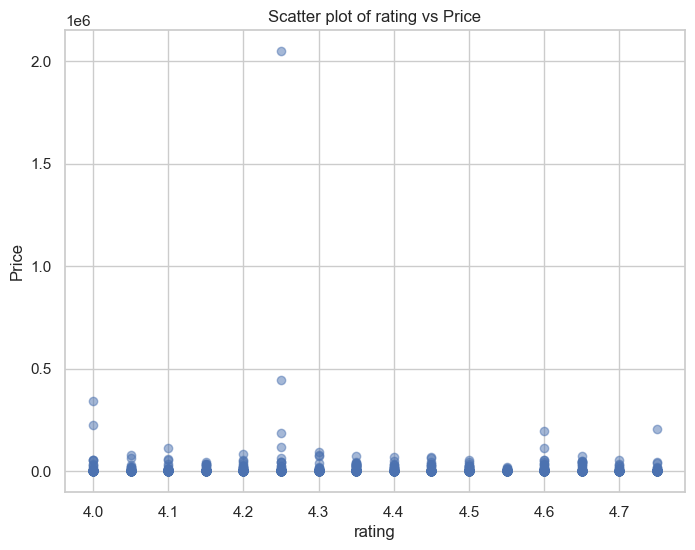

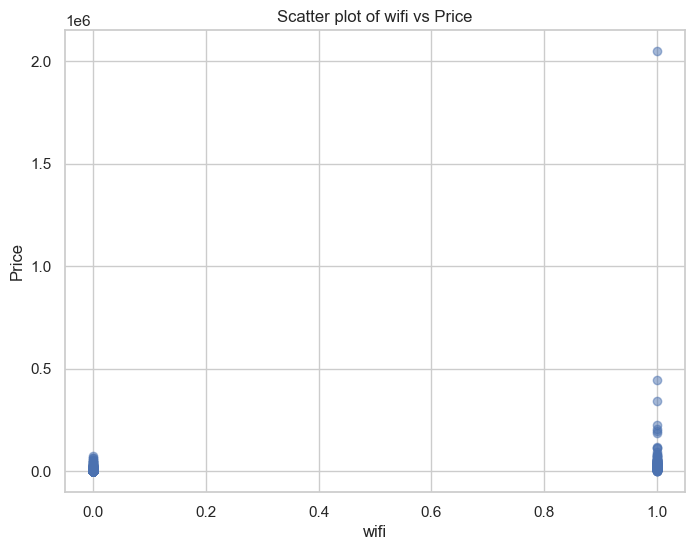

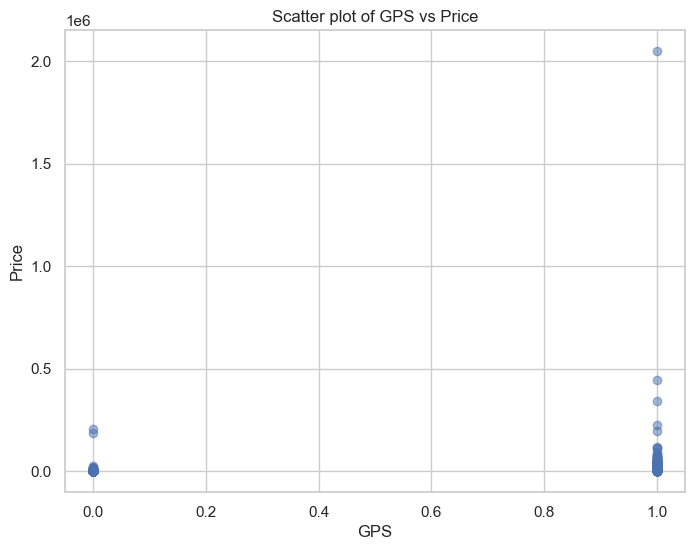

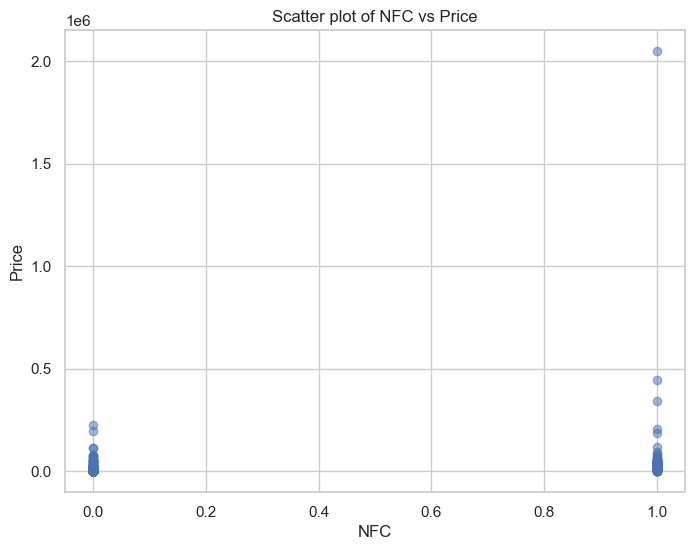

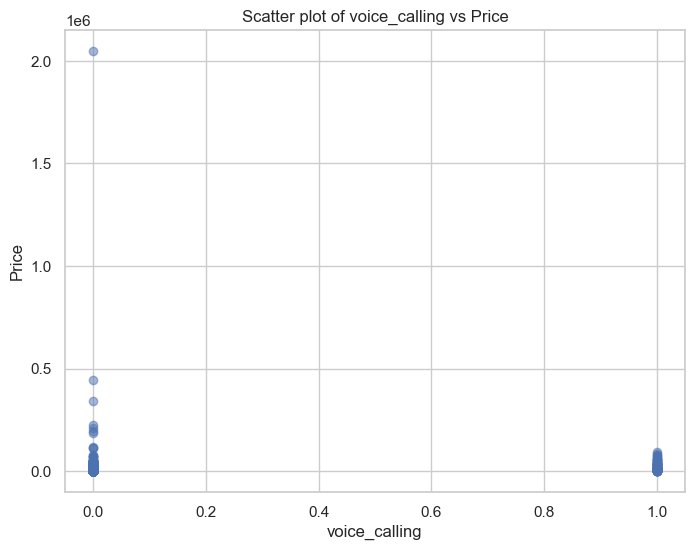

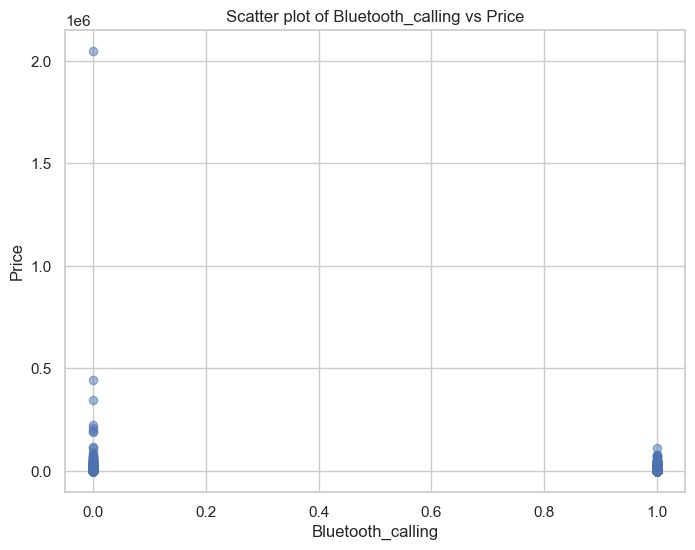

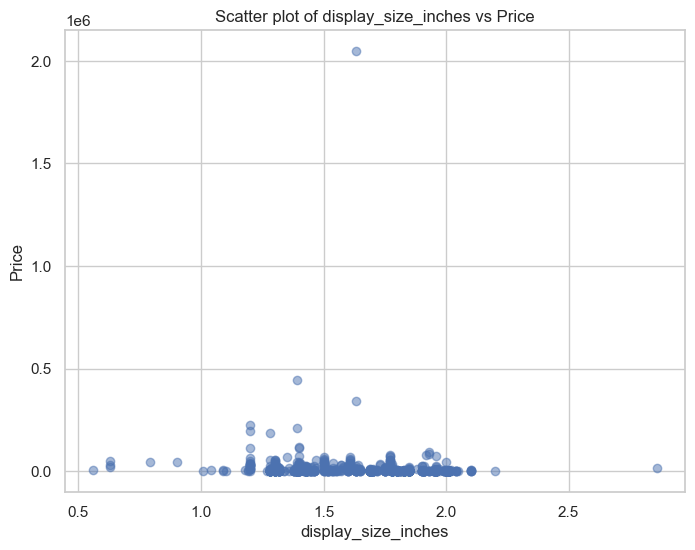

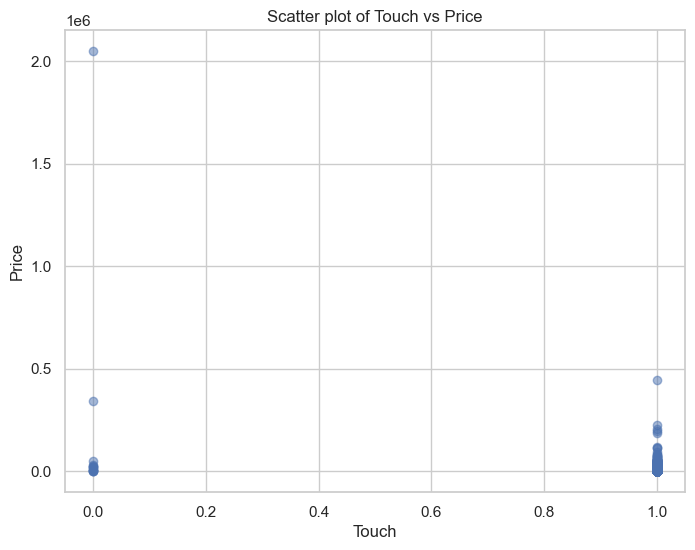

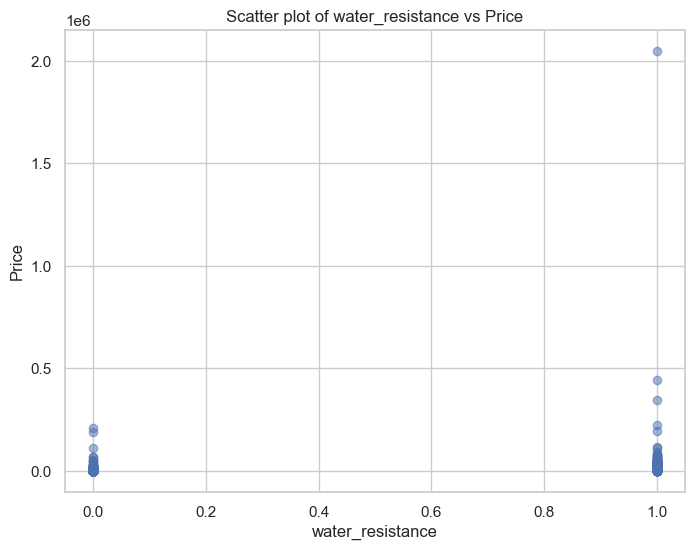

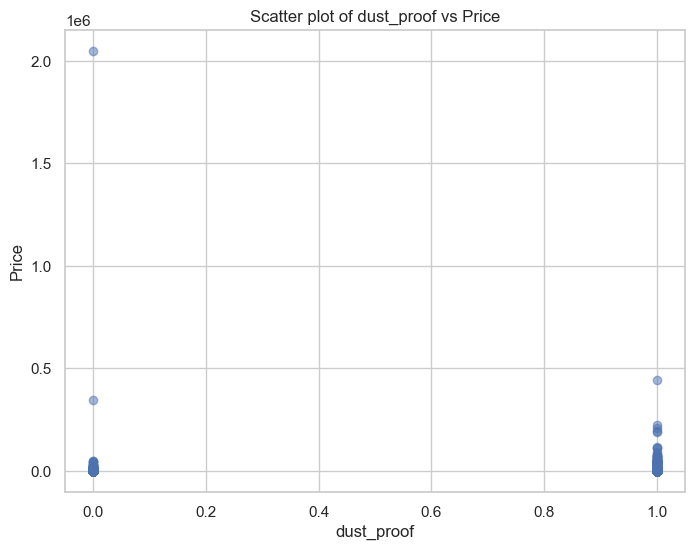

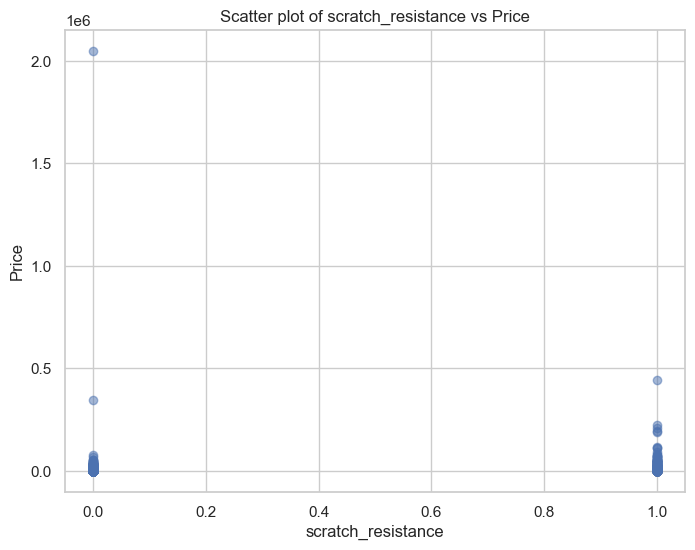

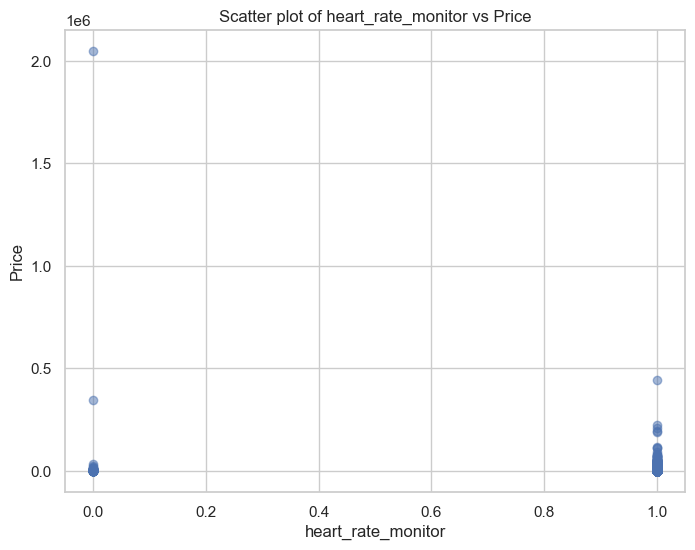

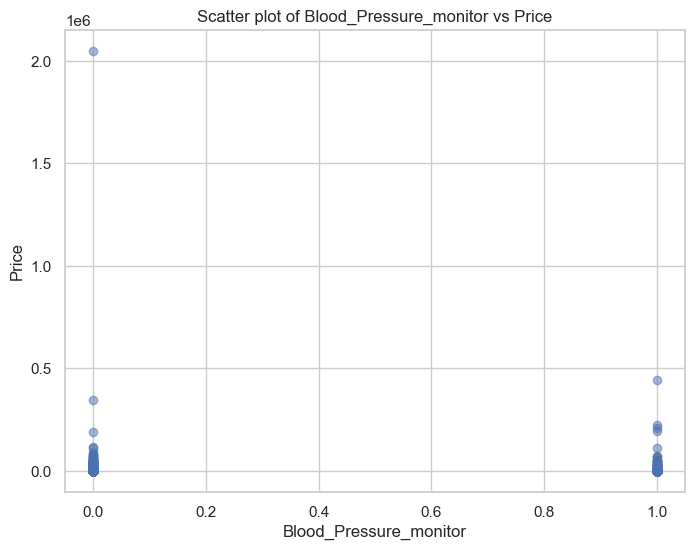

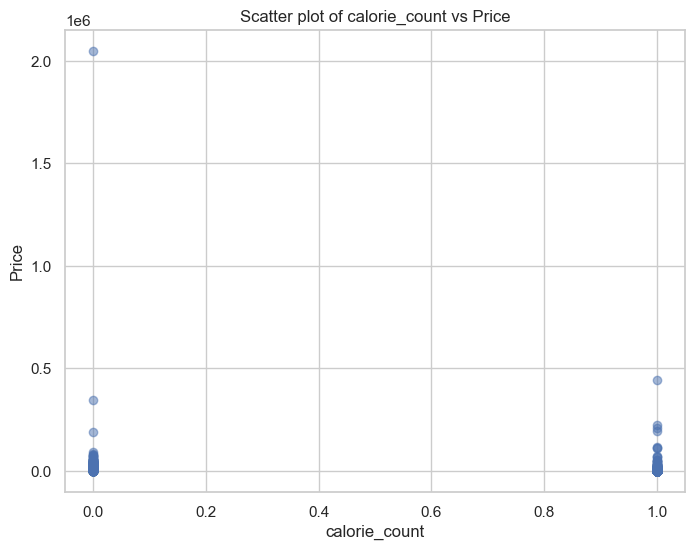

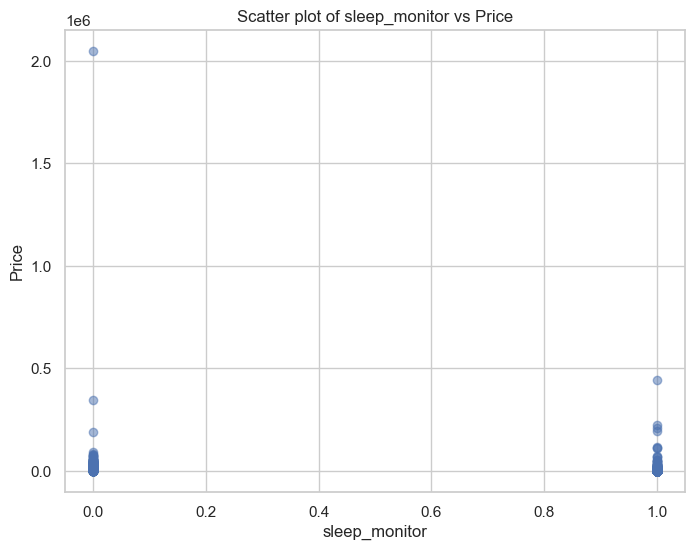

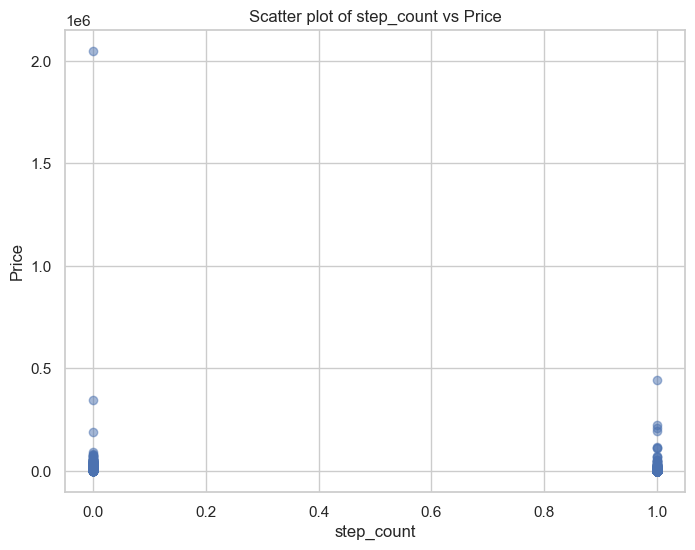

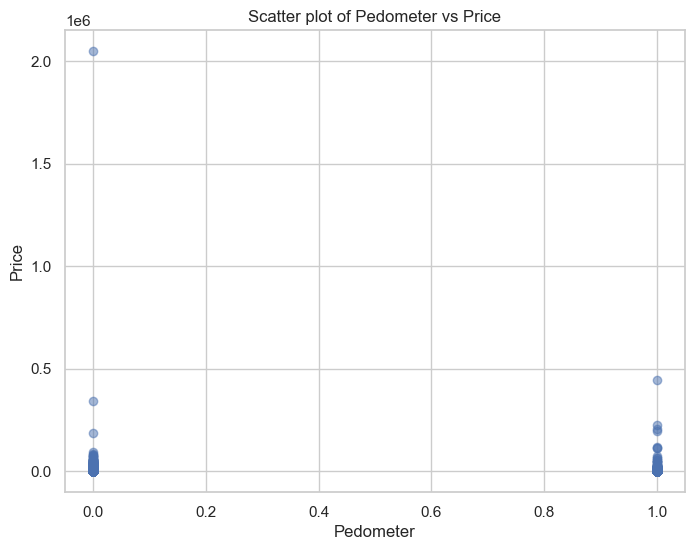

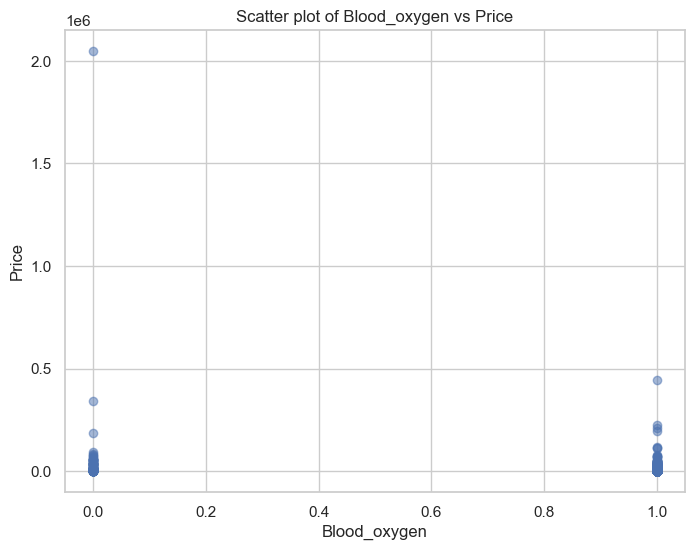

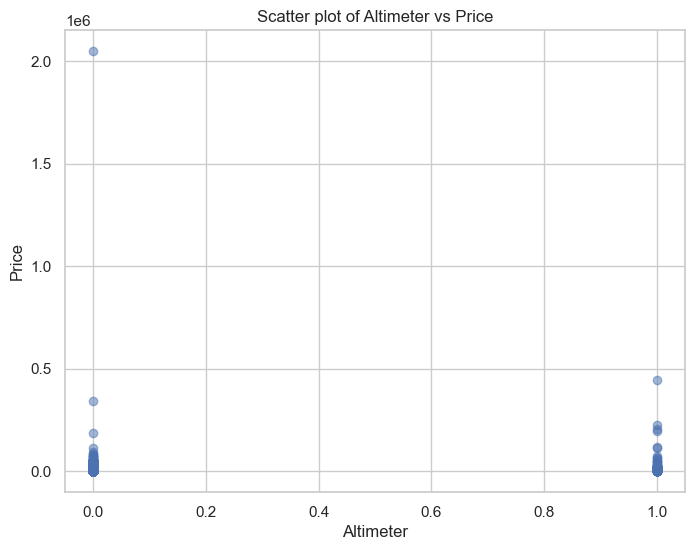

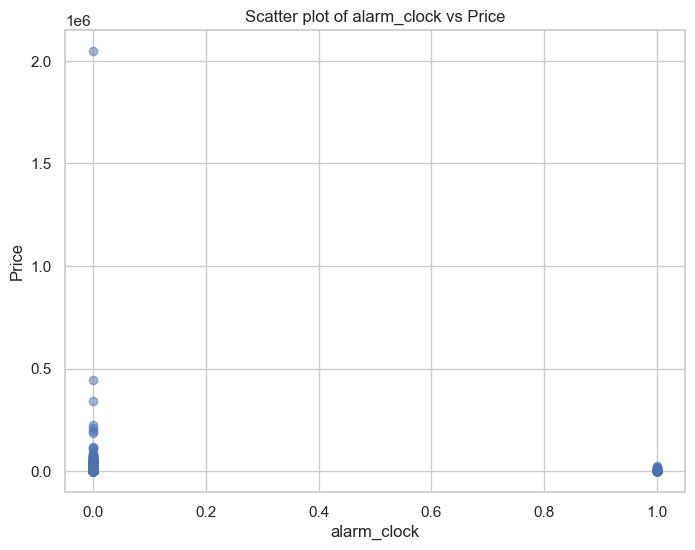

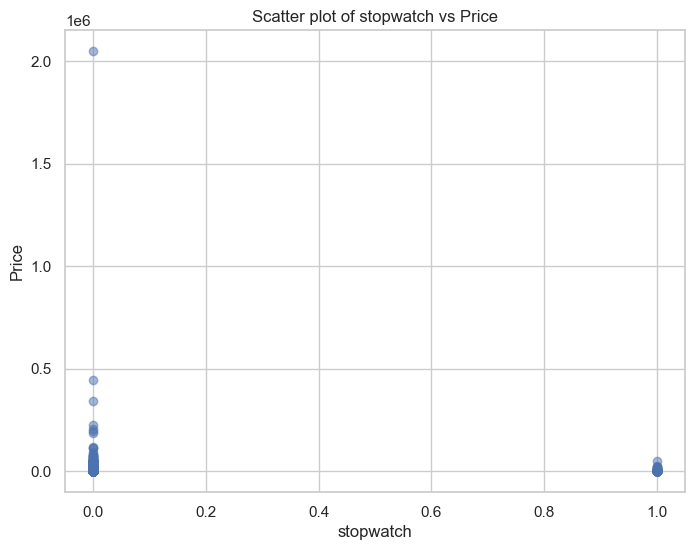

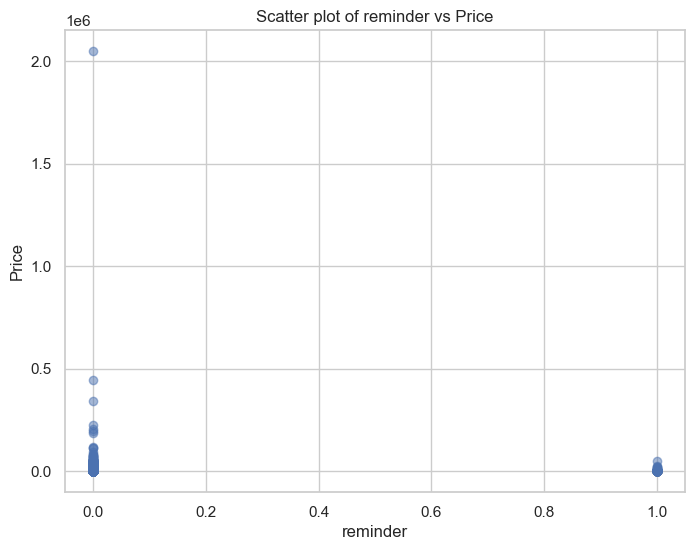

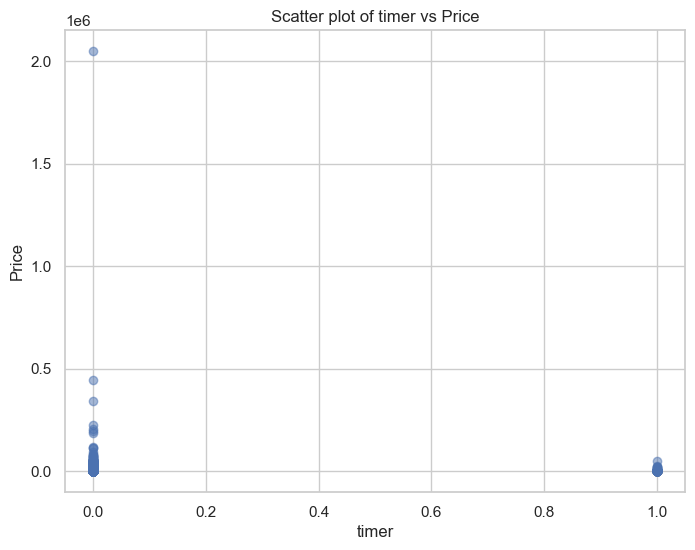

In [20]:
for column in df.columns.drop('price'):  
# Iterating over each column name in the DataFrame df excluding the 'price' column.

    plt.figure(figsize=(8, 6))  
    # Creating a new figure with a specific size for the scatter plot.

    plt.scatter(df[column], df['price'], alpha=0.5)  
    # Creating a scatter plot of the specified column against the 'price' column. The alpha parameter sets the transparency of the markers.

    plt.title(f'Scatter plot of {column} vs Price')  
    # Adding a title to the scatter plot indicating the variables being compared.

    plt.xlabel(column)  
    # Adding a label to the x-axis indicating the column being plotted.

    plt.ylabel('Price')  
    # Adding a label to the y-axis indicating the price.

    plt.grid(True)  
    # Adding grid lines to the plot.

    plt.show()  
    # Displaying the scatter plot.

In [21]:
from sklearn.preprocessing import LabelEncoder  
# Importing the LabelEncoder class from sklearn.preprocessing module.

le = LabelEncoder()  
# Creating an instance of the LabelEncoder class.

df['brand_numerical'] = le.fit_transform(brand)  
# Encoding the 'brand' column using the LabelEncoder instance le and storing the encoded values in a new column 'brand_numerical' in the DataFrame df.

In [22]:
x = df.drop('price', axis=1)  
# Creating the feature matrix x by dropping the 'price' column from the DataFrame df along the specified axis (columns).

y = df.price  
# Creating the target vector y containing the 'price' column from the DataFrame df.

In [23]:
from sklearn.preprocessing import StandardScaler  
# Importing the StandardScaler class from sklearn.preprocessing module.

sc = StandardScaler()  
# Creating an instance of the StandardScaler class.

X_scaled = sc.fit_transform(x)  
# Standardizing the feature matrix x using the fit_transform() method of the StandardScaler instance sc, and storing the standardized values in the variable X_scaled.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
# Splitting the standardized feature matrix X_scaled and target vector y into training and testing sets using the train_test_split function from sklearn.model_selection module. The test_size parameter specifies the proportion of the dataset to include in the test split, and the random_state parameter sets the random seed for reproducibility.

In [25]:
lr = LinearRegression()  
# Creating an instance of the LinearRegression class.

lr.fit(x_train, y_train)  
# Fitting the linear regression model to the training data.

y_pred = lr.predict(x_test)  
# Making predictions on the test data using the trained model.

print('r2 score of Linear regressor:', r2_score(y_test, y_pred))  
# Printing the R-squared score, which measures the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (x), for the linear regression model.

r2 score of Linear regressor: -8.95345333413245


In [26]:
from sklearn.linear_model import SGDRegressor  
# Importing the SGDRegressor class from sklearn.linear_model module.

sgd_regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha=0.001)  
# Creating an instance of the SGDRegressor class with specified hyperparameters: max_iter (maximum number of iterations), tol (tolerance for stopping criteria), and alpha (regularization parameter).

sgd_regressor.fit(x_train, y_train)  
# Fitting the SGD regressor model to the training data.

y_pred_sgd = sgd_regressor.predict(x_test)  
# Making predictions on the test data using the trained SGD regressor model.

print('r2 score of SGD Regressor:', r2_score(y_test, y_pred_sgd))  
# Printing the R-squared score for the SGD regressor model, which measures the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (x).

r2 score of SGD Regressor: -6.635066590574069


In [27]:
df.drop('brand_numerical', axis=1, inplace=True)  
# Dropping the 'brand_numerical' column from the DataFrame df along the specified axis (columns) and making the changes inplace.

In [28]:
def category_minimize(m, s):
    # Count the occurrences of each category in the Series s
    a = s.value_counts()
    # Filter categories with counts greater than m
    b = a[a > m].reset_index().iloc[:, 0].tolist()
    # Keep only the values in s that are in the filtered list of categories
    s = s[s.isin(b)]
    return s

In [29]:
Bluetooth.value_counts()  
# Counting the occurrences of each unique value in the 'Bluetooth' Series and displaying the counts.

Bluetooth
Bluetooth                     322
Bluetooth 5.0                 284
Bluetooth 5.3                 177
Bluetooth 5.2                 104
Bluetooth 5.1                  92
Bluetooth 4.0                   8
Bluetooth 4.2                   3
Bluetooth                       2
Bluetooth 4.1                   1
Bluetooth BLE 5.3 + BT 3.0      1
Bluetooth BLE 5.0 + BT 3.0      1
Name: count, dtype: int64

In [30]:
category_minimize(m=5, s=Bluetooth).value_counts()  
# Applying the category_minimize function to filter the 'Bluetooth' Series, retaining only categories with counts greater than 5, and then counting the occurrences of each unique value in the filtered Series.

Bluetooth
Bluetooth        322
Bluetooth 5.0    284
Bluetooth 5.3    177
Bluetooth 5.2    104
Bluetooth 5.1     92
Bluetooth 4.0      8
Name: count, dtype: int64

In [31]:
j = category_minimize(m=5, s=Bluetooth)  
# Filtering the 'Bluetooth' Series, retaining only categories with counts greater than 5, and storing the result in j.

i = category_minimize(m=5, s=brand)  
# Filtering the 'brand' Series, retaining only categories with counts greater than 5, and storing the result in i.

temp_df = pd.merge(i, j, how='inner', left_index=True, right_index=True)  
# Merging the filtered 'brand' and 'Bluetooth' Series into a DataFrame temp_df using an inner join on their indices, and storing the result in temp_df.

In [32]:
temp_df  
# Displaying the DataFrame temp_df, which contains the merged data from the 'brand' and 'Bluetooth' Series after filtering.

name      Bluetooth
1     Fire Boltt  Bluetooth 5.0
2        Samsung  Bluetooth 5.0
3       Fastrack  Bluetooth 5.2
4           Oppo  Bluetooth 5.0
5          Noise  Bluetooth 5.2
...          ...            ...
1014   Zebronics  Bluetooth 5.0
1015  Fire Boltt  Bluetooth 5.0
1016      Maxima  Bluetooth 5.0
1018      Pebble  Bluetooth 5.0
1019       Noise  Bluetooth 5.1

[795 rows x 2 columns]

<Axes: ylabel='count'>

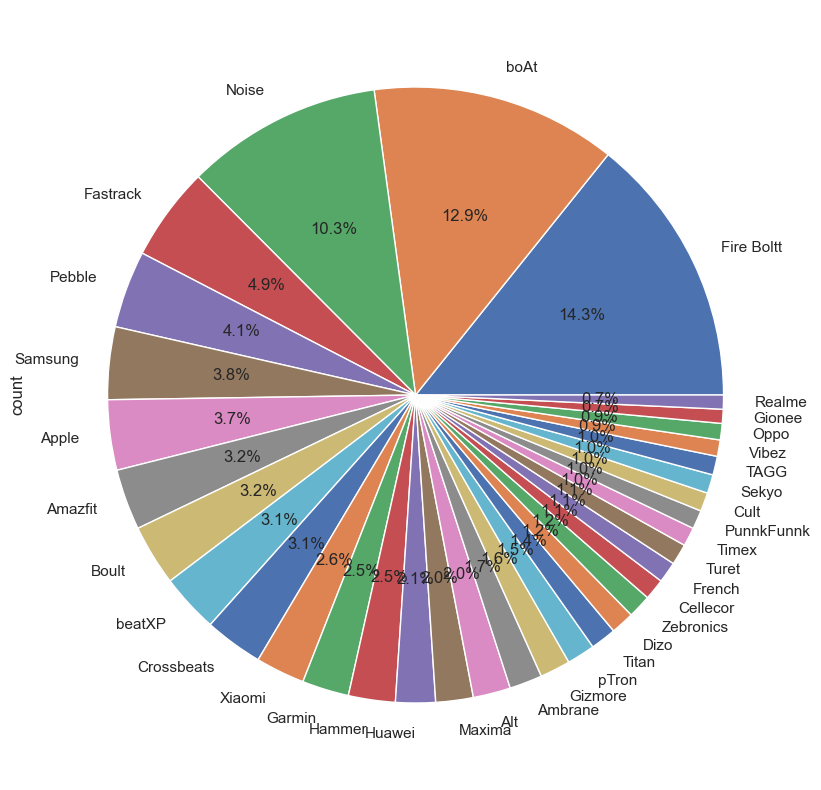

In [33]:
i.value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')  
# Creating a pie chart to visualize the distribution of values in the 'brand' Series after filtering.
# The figsize parameter sets the size of the figure.
# The autopct parameter specifies the format for displaying the percentages on the pie chart.

In [34]:
df1 = pd.merge(temp_df, df, how='inner', left_index=True, right_index=True)  
# Merging the DataFrame temp_df with the original DataFrame df using an inner join on their indices, and storing the result in df1.

In [35]:
from sklearn.preprocessing import LabelEncoder  
# Importing the LabelEncoder class from sklearn.preprocessing module.

le = LabelEncoder()  
# Creating an instance of the LabelEncoder class.

df1['brand_numerical'] = le.fit_transform(df1.name)  
# Encoding the 'name' column of DataFrame df1 using LabelEncoder and storing the encoded values in a new column 'brand_numerical'.

df1['Bluetooth_numerical'] = le.fit_transform(df1.Bluetooth)  
# Encoding the 'Bluetooth' column of DataFrame df1 using LabelEncoder and storing the encoded values in a new column 'Bluetooth_numerical'.

In [36]:
df1.info()  
# Displaying the information about DataFrame df1, including the data types of columns and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 1 to 1019
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    795 non-null    object 
 1   Bluetooth               795 non-null    object 
 2   price                   795 non-null    int64  
 3   rating                  795 non-null    float64
 4   wifi                    795 non-null    int64  
 5   GPS                     795 non-null    int64  
 6   NFC                     795 non-null    int64  
 7   voice_calling           795 non-null    int64  
 8   Bluetooth_calling       795 non-null    int64  
 9   display_size_inches     795 non-null    float64
 10  Touch                   795 non-null    int64  
 11  water_resistance        795 non-null    int64  
 12  dust_proof              795 non-null    int64  
 13  scratch_resistance      795 non-null    int64  
 14  heart_rate_monitor      795 non-null    int64 

In [37]:
x = df1.drop(['price', 'Bluetooth', 'name'], axis=1)  
# Creating a DataFrame x by dropping the columns 'price', 'Bluetooth', and 'name' from df1 along the specified axis (columns).

y = df1.price  
# Creating a Series y containing the target variable 'price'.

In [38]:
from sklearn.preprocessing import StandardScaler  
# Importing the StandardScaler class from sklearn.preprocessing module.

sc = StandardScaler()  
# Creating an instance of the StandardScaler class.

X_scaled = sc.fit_transform(x)  
# Standardizing the features in DataFrame x and storing the scaled values in X_scaled.

In [39]:
from sklearn.model_selection import train_test_split  
# Importing the train_test_split function from sklearn.model_selection module.

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
# Splitting the standardized features (X_scaled) and target variable (y) into training and testing sets, with 20% of the data reserved for testing.
# The random_state parameter ensures reproducibility of the split.

In [40]:
from sklearn.linear_model import LinearRegression  
# Importing the LinearRegression class from sklearn.linear_model module.

lr = LinearRegression()  
# Creating an instance of the LinearRegression class.

lr.fit(x_train, y_train)  
# Fitting the linear regression model to the training data.

y_pred = lr.predict(x_test)  
# Predicting the target variable for the test set using the trained model.

from sklearn.metrics import r2_score  
# Importing the r2_score function from sklearn.metrics module.

print('r2 score of Linear regressor:', r2_score(y_test, y_pred))  
# Calculating and printing the R-squared score to evaluate the performance of the linear regression model.

r2 score of Linear regressor: 0.622684203863787


In [41]:
from sklearn.linear_model import SGDRegressor  
# Importing the SGDRegressor class from sklearn.linear_model module.

sgd_regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha=0.001)  
# Creating an instance of the SGDRegressor class with specified hyperparameters.

sgd_regressor.fit(x_train, y_train)  
# Fitting the SGD regressor model to the training data.

y_pred_sgd = sgd_regressor.predict(x_test)  
# Predicting the target variable for the test set using the trained SGD regressor model.

print('r2 score of SGD Regressor:', r2_score(y_test, y_pred_sgd))  
# Calculating and printing the R-squared score to evaluate the performance of the SGD regressor model.

r2 score of SGD Regressor: 0.6259359277980667


In [42]:
i = category_minimize(m=20, s=brand)  
# Applying the category_minimize function to reduce the categories in the 'brand' Series to those with at least 20 occurrences.

df2 = df.loc[i.index, df.columns]  
# Selecting rows from DataFrame df corresponding to the reduced categories in the 'brand' Series and storing the result in df2.

In [43]:
from sklearn.preprocessing import LabelEncoder  
# Importing the LabelEncoder class from sklearn.preprocessing module.

le = LabelEncoder()  
# Creating an instance of the LabelEncoder class.

df2['brand_numerical'] = le.fit_transform(i)  
# Encoding the reduced 'brand' categories in Series i and storing the numerical labels in a new column 'brand_numerical' in DataFrame df2.

<Axes: ylabel='count'>

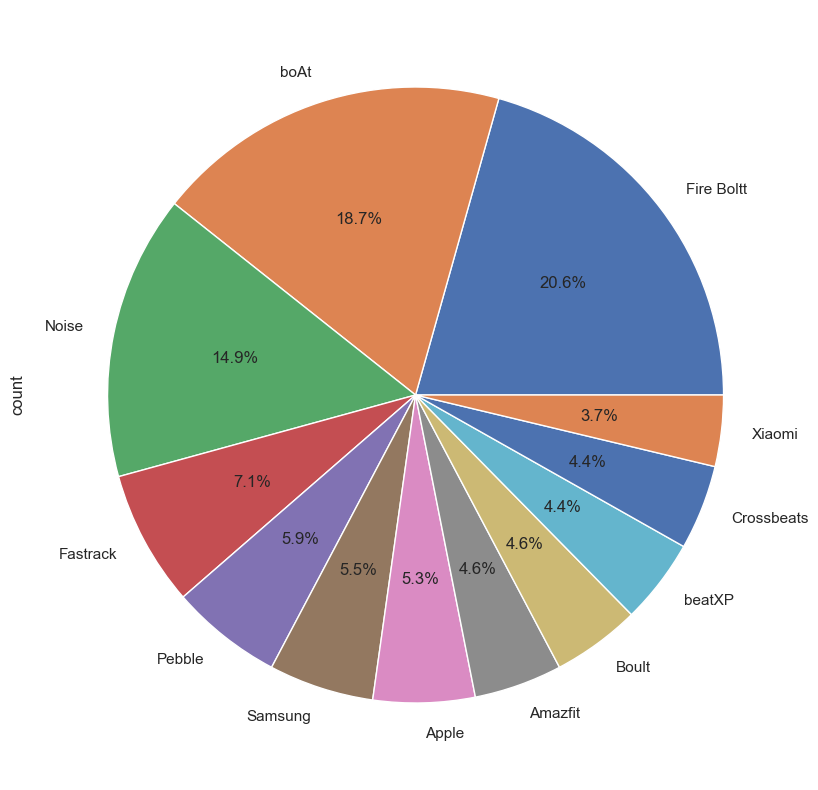

In [44]:
i.value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')  
# Creating a pie chart to visualize the distribution of the reduced categories in Series i.
# Setting the figure size to (10, 10) and displaying the percentage labels on the pie chart.

In [45]:
df2.info()  
# Displaying the concise summary of DataFrame df2, including information about the data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 1 to 1019
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   562 non-null    int64  
 1   rating                  562 non-null    float64
 2   wifi                    562 non-null    int64  
 3   GPS                     562 non-null    int64  
 4   NFC                     562 non-null    int64  
 5   voice_calling           562 non-null    int64  
 6   Bluetooth_calling       562 non-null    int64  
 7   display_size_inches     562 non-null    float64
 8   Touch                   562 non-null    int64  
 9   water_resistance        562 non-null    int64  
 10  dust_proof              562 non-null    int64  
 11  scratch_resistance      562 non-null    int64  
 12  heart_rate_monitor      562 non-null    int64  
 13  Blood_Pressure_monitor  562 non-null    int64  
 14  calorie_count           562 non-null    int64 

In [46]:
i.value_counts()  
# Counting the occurrences of each value in Series i.

name
Fire Boltt    116
boAt          105
Noise          84
Fastrack       40
Pebble         33
Samsung        31
Apple          30
Amazfit        26
Boult          26
beatXP         25
Crossbeats     25
Xiaomi         21
Name: count, dtype: int64

In [47]:
x = df2.drop('price', axis=1)  
# Assigning the features (independent variables) to DataFrame x by dropping the 'price' column.

y = df2.price  
# Assigning the target variable (dependent variable) to Series y.

In [48]:
from sklearn.preprocessing import StandardScaler  
# Importing the StandardScaler class from sklearn.preprocessing module.

sc = StandardScaler()  
# Creating an instance of the StandardScaler class.

X_scaled = sc.fit_transform(x)  
# Standardizing the features in DataFrame x and storing the standardized values in X_scaled.

In [49]:
from sklearn.model_selection import train_test_split  
# Importing the train_test_split function from sklearn.model_selection module.

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
# Splitting the scaled features (X_scaled) and target variable (y) into training and testing sets.
# Using 80% of the data for training and 20% for testing.
# Setting random_state to 42 for reproducibility.

In [50]:
from sklearn.linear_model import LinearRegression  
# Importing the LinearRegression class from sklearn.linear_model module.

lr = LinearRegression()  
# Creating an instance of the LinearRegression class.

lr.fit(x_train, y_train)  
# Fitting the linear regression model to the training data.

y_pred = lr.predict(x_test)  
# Making predictions on the test data using the trained model.

from sklearn.metrics import r2_score  
# Importing the r2_score function from sklearn.metrics module.

print('r2 score of Linear regressor:', r2_score(y_test, y_pred))  
# Calculating and printing the R-squared score of the linear regression model.

r2 score of Linear regressor: 0.7381294565973069


In [51]:
from sklearn.linear_model import SGDRegressor  
# Importing the SGDRegressor class from sklearn.linear_model module.

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.01)  
# Creating an instance of the SGDRegressor class with specified parameters.

sgd_regressor.fit(x_train, y_train)  
# Fitting the SGD regressor model to the training data.

y_pred_sgd = sgd_regressor.predict(x_test)  
# Making predictions on the test data using the trained model.

print('r2 score of SGD Regressor:', r2_score(y_test, y_pred_sgd))  
# Calculating and printing the R-squared score of the SGD regressor model.

r2 score of SGD Regressor: 0.7335692923330275


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 1 to 1019
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   562 non-null    int64  
 1   rating                  562 non-null    float64
 2   wifi                    562 non-null    int64  
 3   GPS                     562 non-null    int64  
 4   NFC                     562 non-null    int64  
 5   voice_calling           562 non-null    int64  
 6   Bluetooth_calling       562 non-null    int64  
 7   display_size_inches     562 non-null    float64
 8   Touch                   562 non-null    int64  
 9   water_resistance        562 non-null    int64  
 10  dust_proof              562 non-null    int64  
 11  scratch_resistance      562 non-null    int64  
 12  heart_rate_monitor      562 non-null    int64  
 13  Blood_Pressure_monitor  562 non-null    int64  
 14  calorie_count           562 non-null    int64 

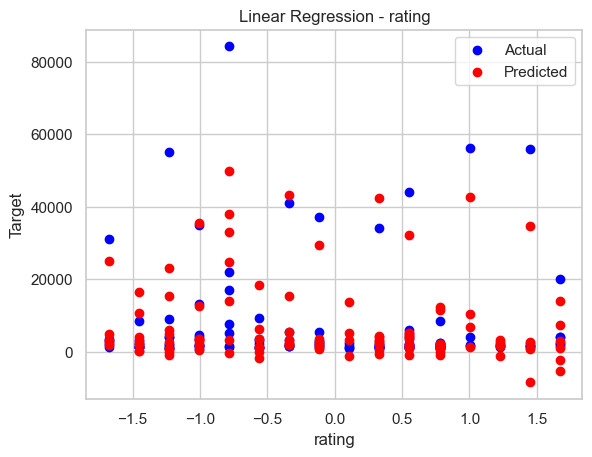

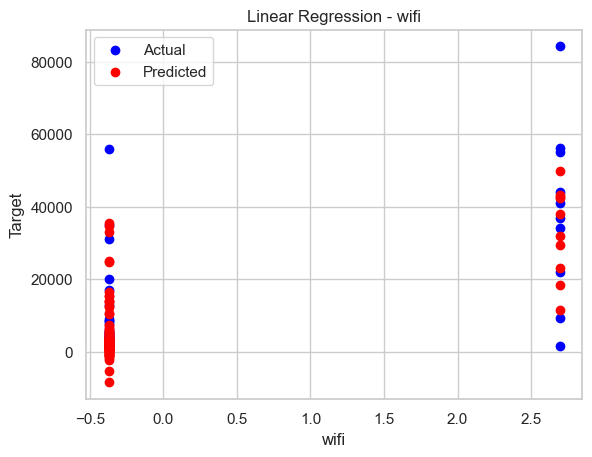

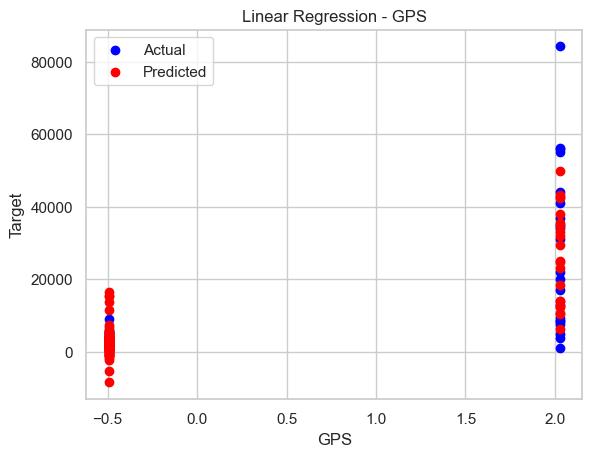

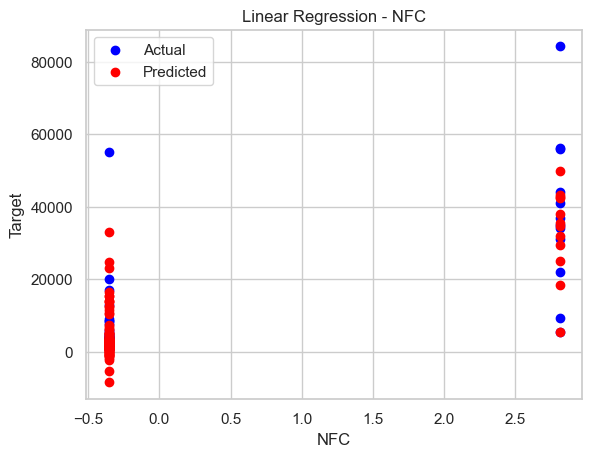

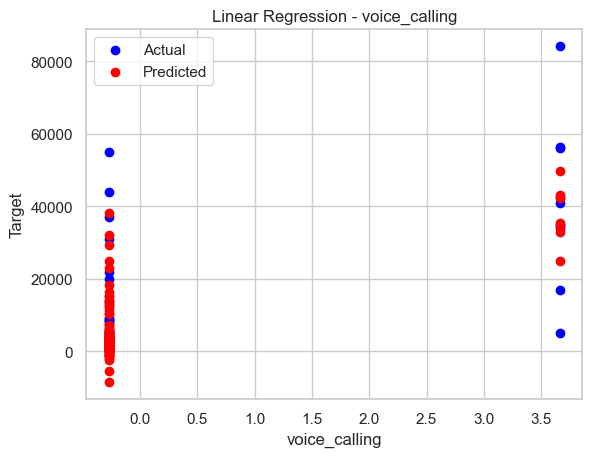

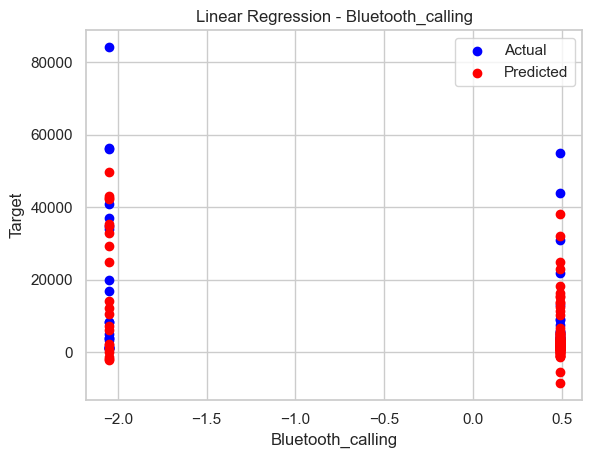

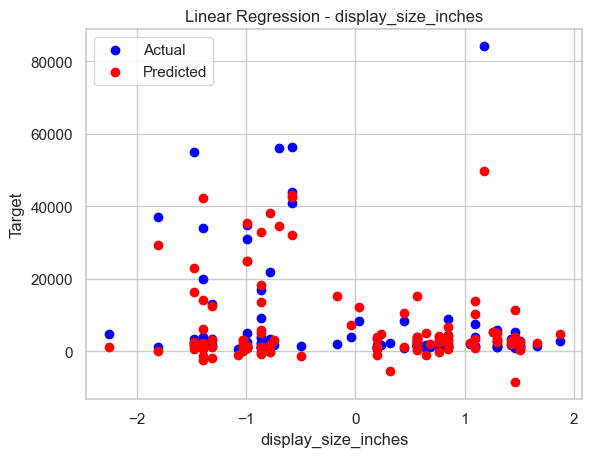

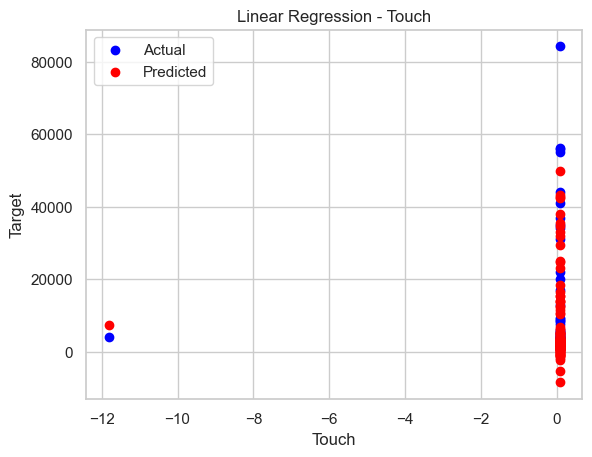

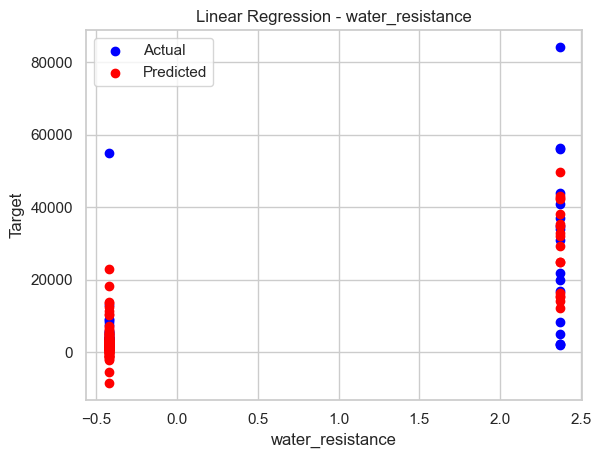

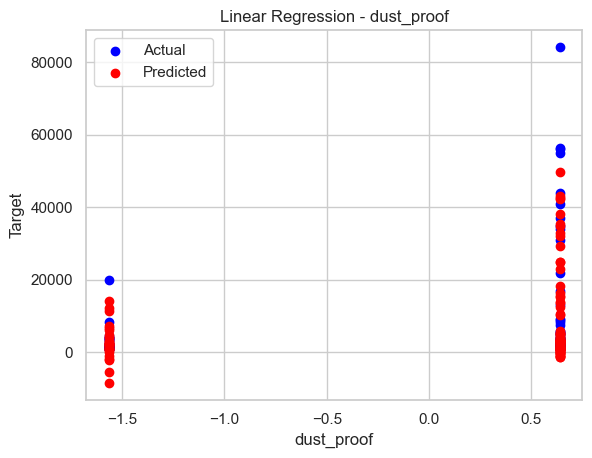

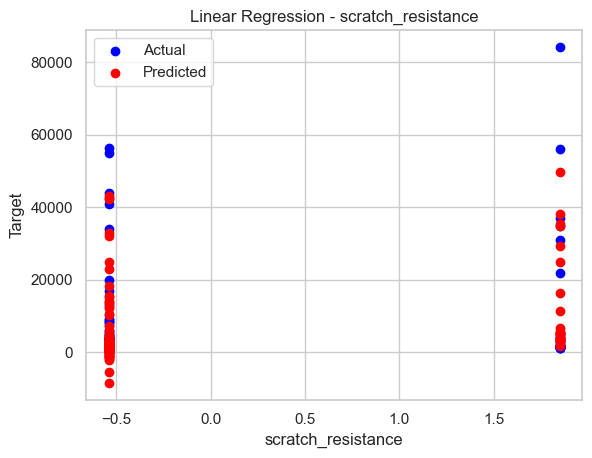

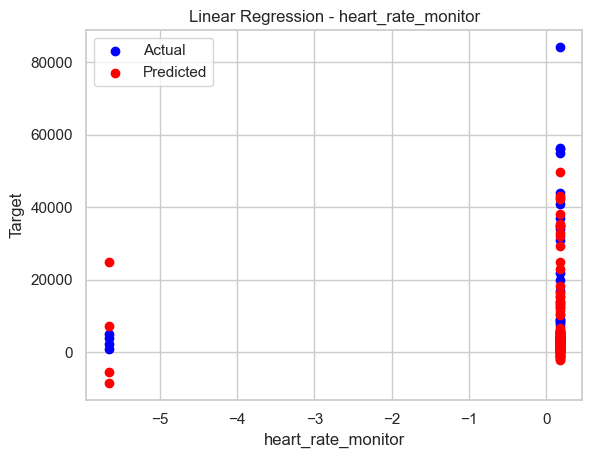

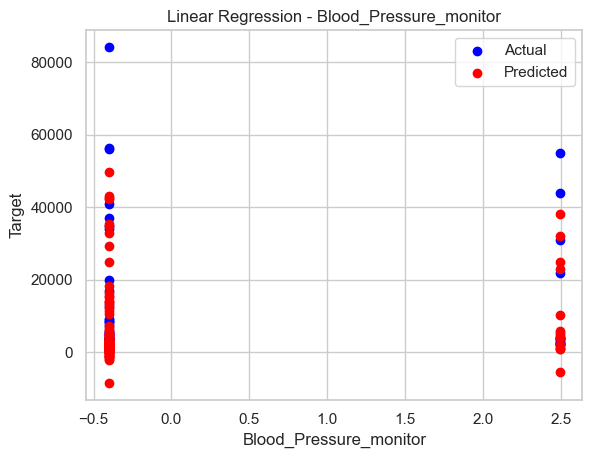

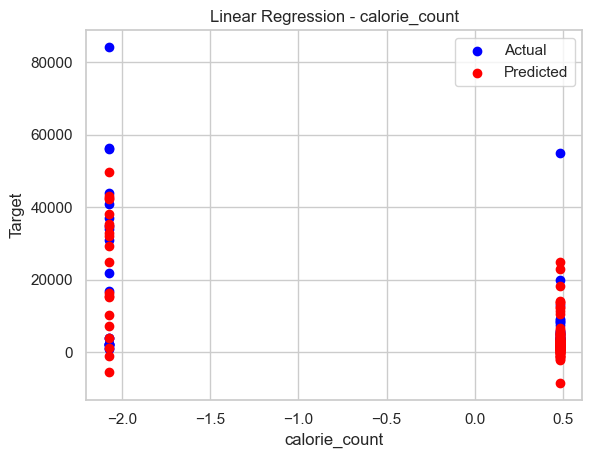

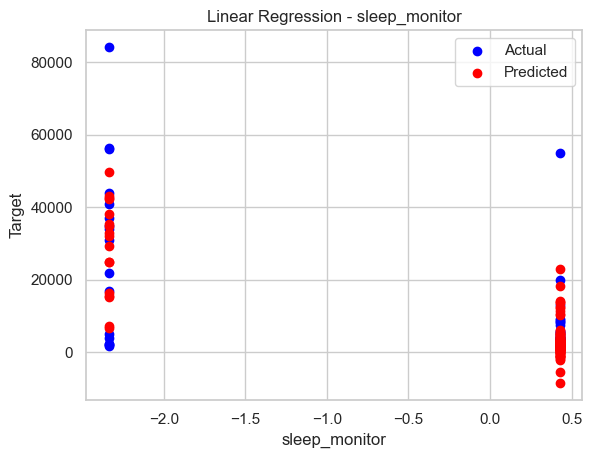

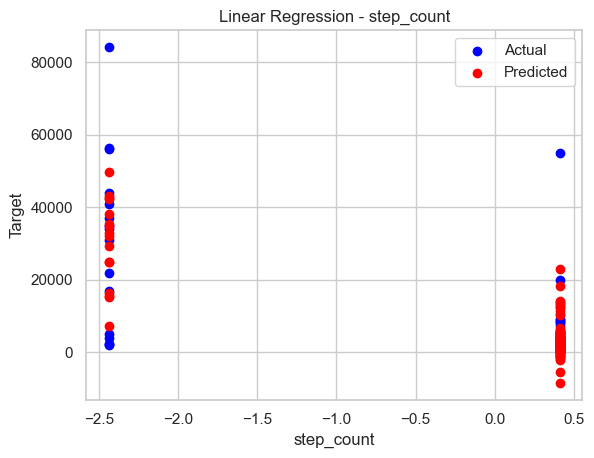

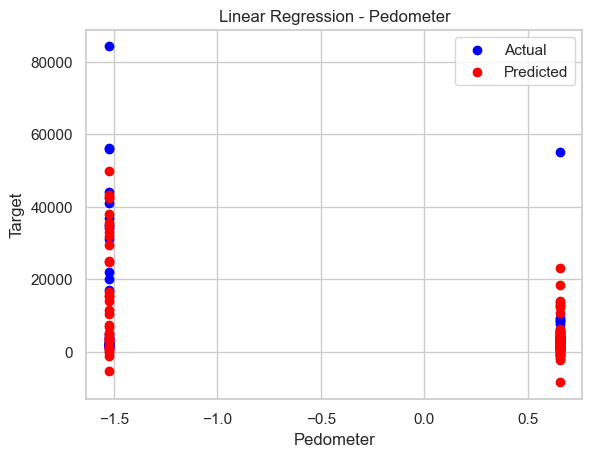

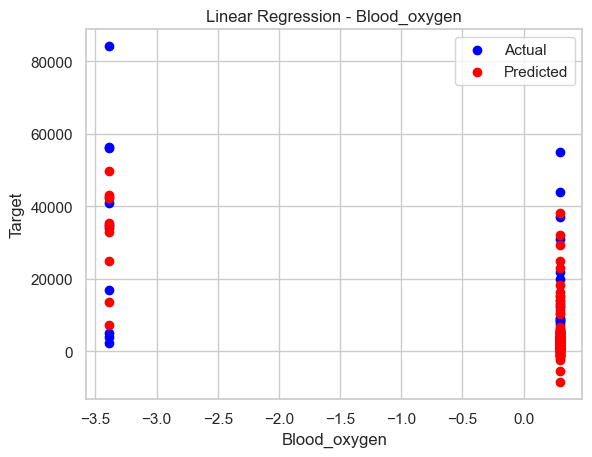

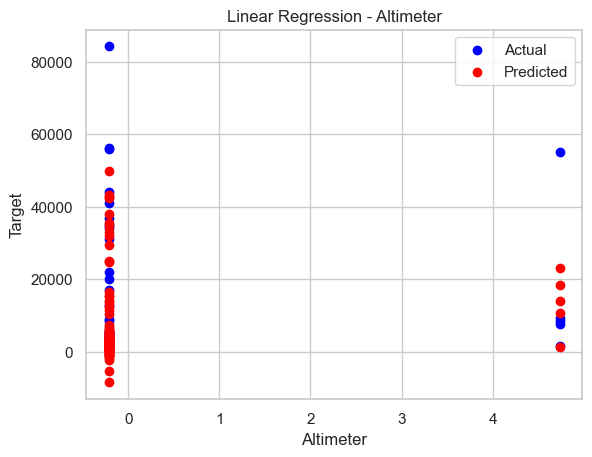

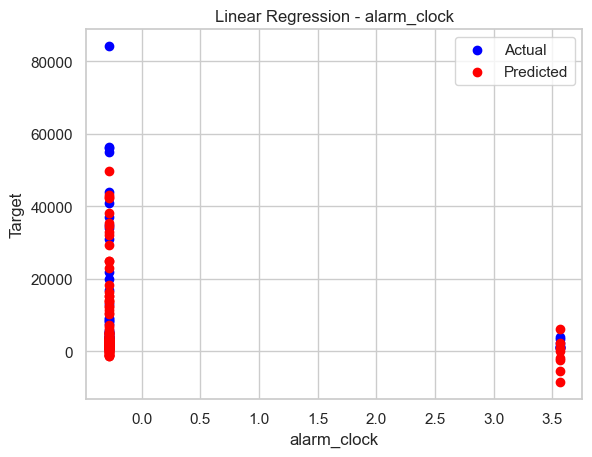

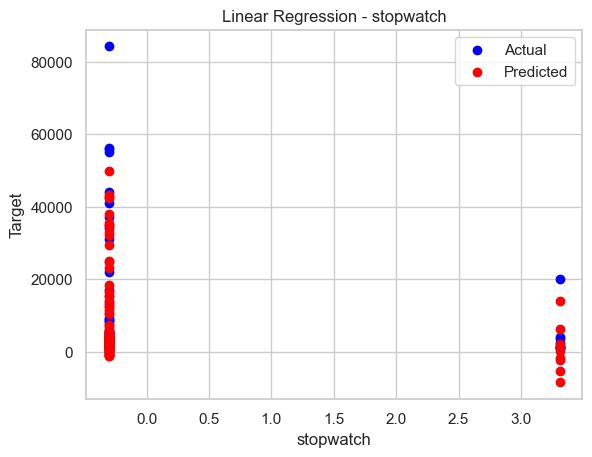

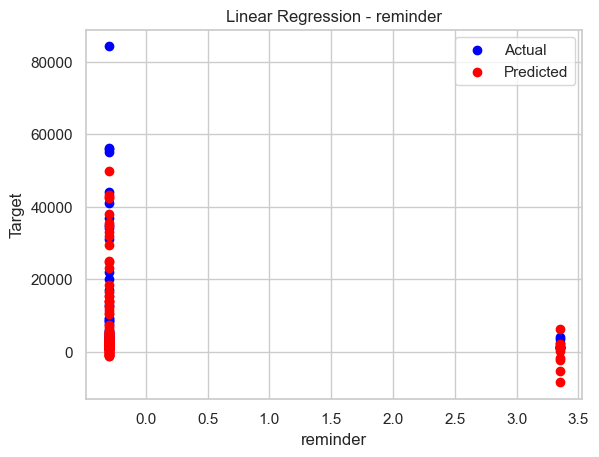

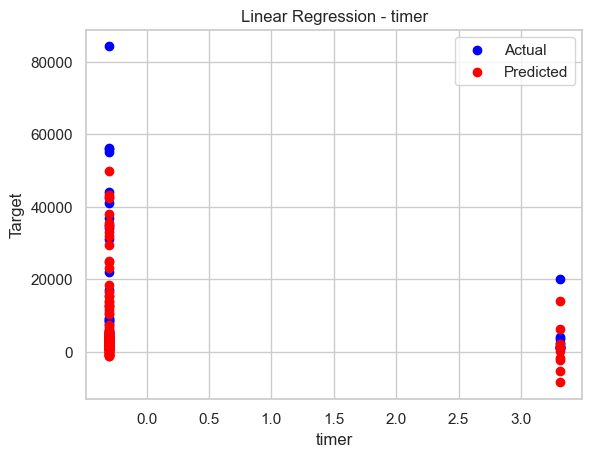

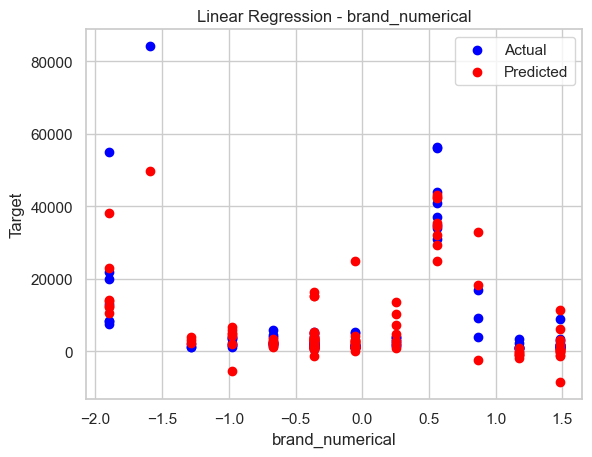

In [53]:
columns=['rating', 'wifi', 'GPS', 'NFC', 'voice_calling',
'Bluetooth_calling', 'display_size_inches', 'Touch', 'water_resistance',
'dust_proof', 'scratch_resistance', 'heart_rate_monitor',
'Blood_Pressure_monitor', 'calorie_count', 'sleep_monitor',
'step_count', 'Pedometer', 'Blood_oxygen', 'Altimeter', 'alarm_clock',
'stopwatch', 'reminder', 'timer', 'brand_numerical']

# Loop through each column
for i in range(len(columns)):
    # Scatter plot for actual vs. predicted values
    plt.scatter(x_test[:,i], y_test, label='Actual', color='blue')  # Plot actual values
    plt.scatter(x_test[:,i], y_pred, label='Predicted', color='red')  # Plot predicted values
    plt.xlabel(columns[i])  # Set x-axis label to current column name
    plt.ylabel('Target')  # Set y-axis label
    plt.title('Linear Regression - {}'.format(columns[i]))  # Set plot title with current column name
    plt.legend()  # Show legend
    plt.show()  # Display plot

In [54]:
# Function call to obtain the indices of the categories with the minimum value
# of 10, with respect to the 'brand' column
i = category_minimize(m=10, s=brand)

# Filter the DataFrame 'df' using the obtained indices from the category_minimize function
# and selecting all columns of the DataFrame
df3 = df.loc[i.index, df.columns]

In [55]:
# Importing the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class
le = LabelEncoder()

# Using the LabelEncoder instance to transform the 'brand_numerical' column of DataFrame 'df3'
# by fitting it to the values obtained from the category_minimize function and transforming them
df3['brand_numerical'] = le.fit_transform(i)

<Axes: ylabel='count'>

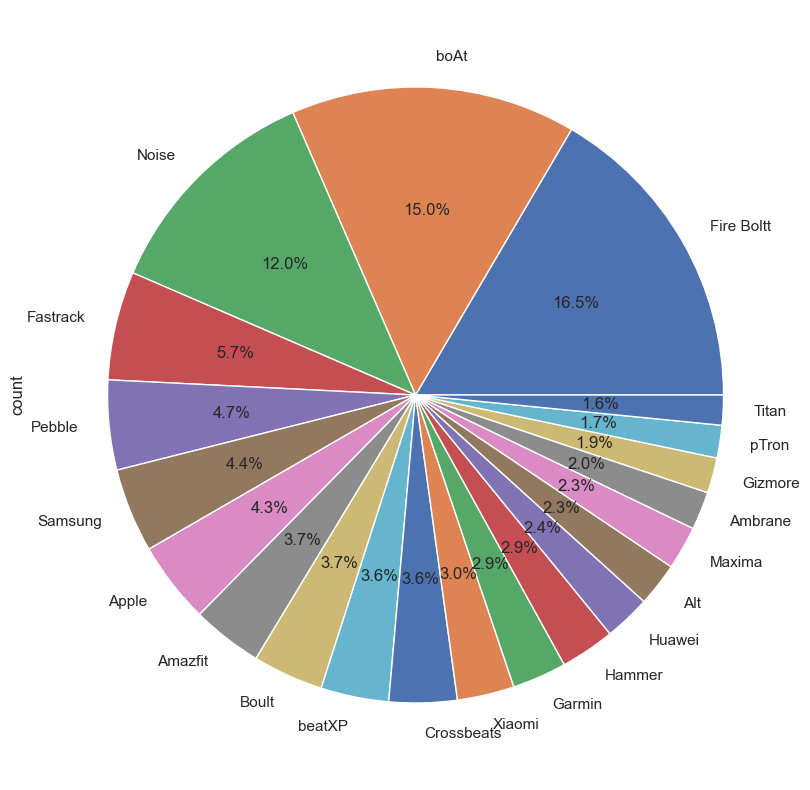

In [56]:
# Generating a pie chart of the value counts of the Series 'i'
# 'i' is assumed to be a pandas Series object
i.value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')

# 'kind' parameter specifies the type of plot, in this case, it's set to 'pie' for a pie chart
# 'figsize' parameter sets the size of the figure to (10, 10)
# 'autopct' parameter specifies the format of the percentage labels on the pie chart
# '%1.1f%%' formats the percentages to have one digit before the decimal point and one digit after
# the decimal point, followed by a percent sign